In [ ]:
!pip install nltk

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweets_table = pd.read_csv('tweets-data.csv')
tweets_table.head()


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag
0,0,2023-06-25 19:16:20+00:00,0,NaN,@jacksonhinklle #wagner with 6.2 billion dolla...,wagner
1,1,2023-06-25 19:16:18+00:00,0,NaN,Pobrecito es discapacitado\n#Reddetuiterosdemo...,wagner
2,2,2023-06-25 19:16:07+00:00,0,NaN,News from the EIR Daily Alert\n\n“#Putin Addre...,wagner
3,3,2023-06-25 19:15:56+00:00,0,NaN,It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...,wagner
4,4,2023-06-25 19:15:54+00:00,0,NaN,Il passaggio chiave di Machiavelli era questo ...,wagner


In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tweet(tweet_text):
    tweet_text = str(tweet_text).lower()
    tweet_text = re.sub(r"http\S+|www\S+|https\S+", '', tweet_text)  # Remove URLs
    tweet_text = re.sub(r"@\w+|#\w+", '', tweet_text)               # Remove mentions/hashtags
    tweet_text = re.sub(r"[^a-z\s]", '', tweet_text)                # Remove punctuation/numbers
    words = tweet_text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply to a sample of 500 rows
tweets_table_sample = tweets_table.sample(500, random_state=42).copy()
tweets_table_sample['clean_tweet_text'] = tweets_table_sample['Tweets'].apply(clean_tweet)
display(tweets_table_sample.head(2))

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag,clean_text
2899,897,2023-06-25 11:06:23+00:00,2,NaN,Le #DessinDePresse de Sanaga : ls sont morts c...,titan,le de sanaga ls sont morts comme ils ont vcu r...
594,594,2023-06-25 18:23:19+00:00,0,NaN,#Russia #Wagner #RussiaCivilWar https://t.co/P...,wagner,


In [ ]:
sid = SentimentIntensityAnalyzer()
tweets_table_sample['sentiment'] = tweets_table_sample['clean_tweet_text'].apply(lambda x: sid.polarity_scores(x)['total_sentiment'])
display(tweets_table_sample[['Tweets', 'clean_tweet_text', 'sentiment']].head())

,Tweets,clean_text,sentiment
2899,Le #DessinDePresse de Sanaga : ls sont morts c...,le de sanaga ls sont morts comme ils ont vcu r...,0.0000
594,#Russia #Wagner #RussiaCivilWar https://t.co/P...,,0.0000
2870,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,exclusive content,0.1280
52,Auch heute geht die politische Nachricht des T...,auch heute geht die politische nachricht des t...,-0.5994
1391,@crazyclipsonly Same type that would take a ho...,type would take homemade playstationcontrolled...,0.0000


,count
sentiment_category,
Neutral,291
Positive,108
Negative,101


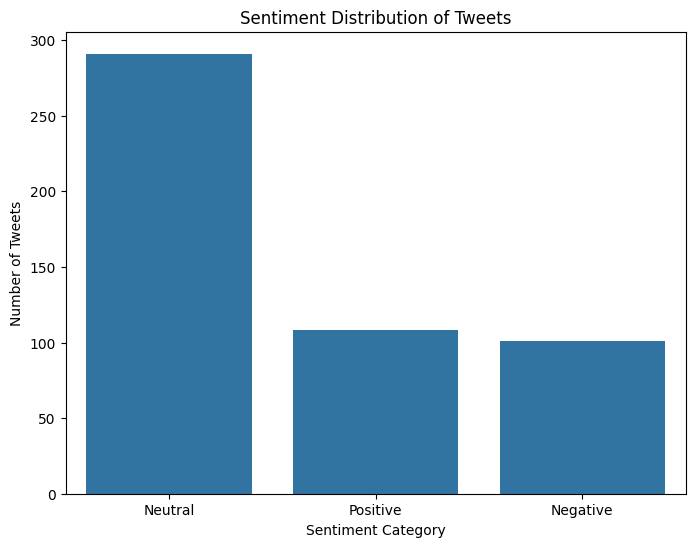

In [ ]:
# Categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

tweets_table_sample['sentiment_category'] = tweets_table_sample['sentiment'].apply(categorize_sentiment)

# Visualize sentiment distribution
sentiment_counts = tweets_table_sample['sentiment_category'].value_counts()
display(sentiment_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
sid = SentimentIntensityAnalyzer()

def vader_sentiment(tweet_text):
    scores = sid.polarity_scores(tweet_text)
    total_sentiment = scores['total_sentiment']
    # Standard labeling: total_sentiment >= 0.05 happy_scoreitive, <= -0.05 angry_scoreative, else neutral_scoretral
    if total_sentiment >= 0.05:
        label = "happy_scoreitive"
    elif total_sentiment <= -0.05:
        label = "angry_scoreative"
    else:
        label = "neutral_scoretral"
    return pd.Series([label, total_sentiment])

# Apply function
tweets_table_sample[['sentiment', 'sentiment_score']] = tweets_table_sample['clean_tweet_text'].apply(vader_sentiment)
tweets_table_sample[['Tweets', 'clean_tweet_text', 'sentiment', 'sentiment_score']].head(10)

,Tweets,clean_text,sentiment,sentiment_score
2899,Le #DessinDePresse de Sanaga : ls sont morts c...,le de sanaga ls sont morts comme ils ont vcu r...,neutral,0.0000
594,#Russia #Wagner #RussiaCivilWar https://t.co/P...,,neutral,0.0000
2870,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,exclusive content,positive,0.1280
52,Auch heute geht die politische Nachricht des T...,auch heute geht die politische nachricht des t...,negative,-0.5994
1391,@crazyclipsonly Same type that would take a ho...,type would take homemade playstationcontrolled...,neutral,0.0000
807,#SUGA_AgustD_TOUR_in_Seoul #SUGA_AgustD_TOUR #...,,neutral,0.0000
2761,#Titan mishap: #Implosion with incredible forc...,mishap incredible force amp speed crushing wat...,negative,-0.5859
196,#Wagner #Russia,,neutral,0.0000
1576,#merri le #titanic 2 le retour https://t.co/4s...,le le retour via,neutral,0.0000
670,"Il Segretario di Stato americano #Blinken: ""no...",il segretario di stato americano non credo che...,neutral,0.0000


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

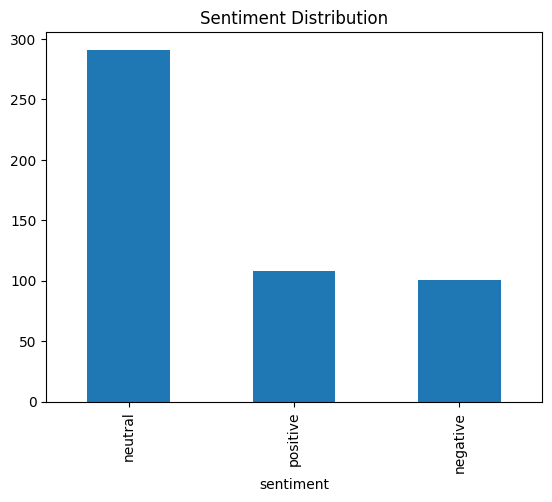

In [ ]:
tweets_table_sample['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
